In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [12]:
!pip install six

In [13]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [15]:
# # plotting tree with max_depth=3
# dot_data = StringIO()  

# export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
#                 feature_names=X.columns, 
#                 class_names=['No Disease', "Disease"])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())
# #Image(graph.create_png(),width=800,height=900)
# #graph.write_pdf("dt_heartdisease.pdf")

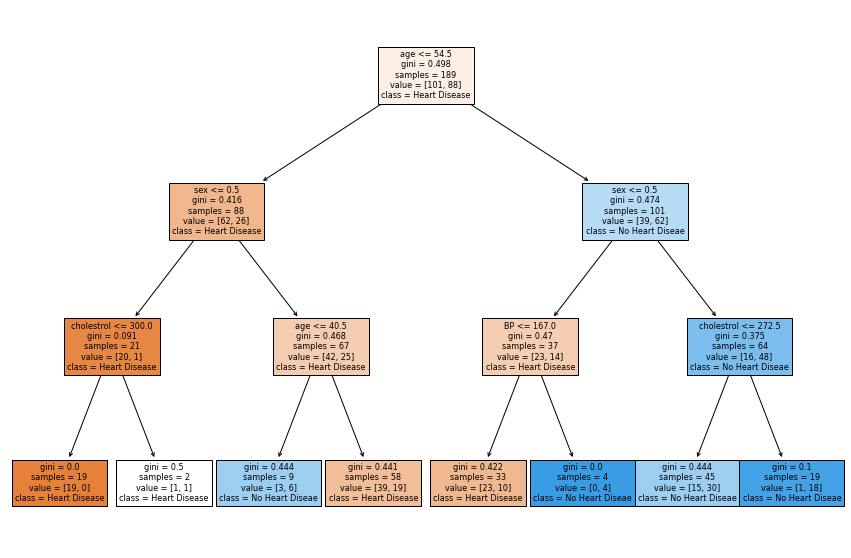

In [53]:
from sklearn.tree import plot_tree
import graphviz
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, 
          feature_names=['age','sex','BP','cholestrol'], class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [31]:
df.feature_names = X_train

In [33]:
df.feature_names

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

In [34]:
df.target_names = y_train

C:\Users\RAJDEEP\AppData\Local\Temp\ipykernel_7524\2333363441.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = y_train


[Text(0.5, 0.875, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = Heart Disease'),
 Text(0.25, 0.625, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = Heart Disease'),
 Text(0.125, 0.375, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Heart Disease'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = Heart Disease'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Heart Disease'),
 Text(0.375, 0.375, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = Heart Disease'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = No Heart Diseae'),
 Text(0.4375, 0.125, 'gini = 0.441\nsamples = 58\nvalue = [39, 19]\nclass = Heart Disease'),
 Text(0.75, 0.625, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]\nclass = No Heart Diseae'),
 Text(0.625, 0.375, 'BP <= 167.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14]\nclass = Heart Disease'),
 T

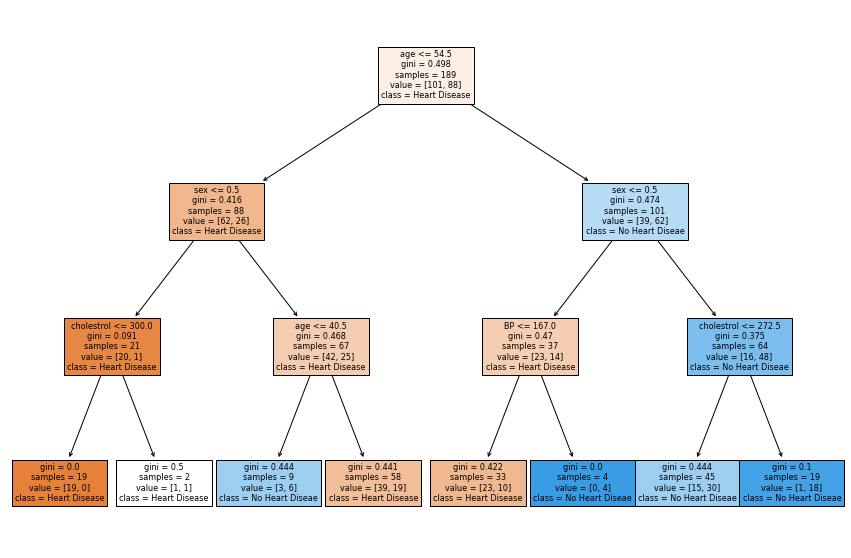

In [52]:
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=['age','sex','BP','cholestrol'], class_names = ['Heart Disease','No Heart Diseae'])

#### Evaluating model performance

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [21]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [44]:
# def get_dt_graph(dt_classifier):
#     dot_data = StringIO()
#     export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
#                     feature_names=X.columns, 
#                     class_names=['Disease', "No Disease"])
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#     return graph

In [23]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [24]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

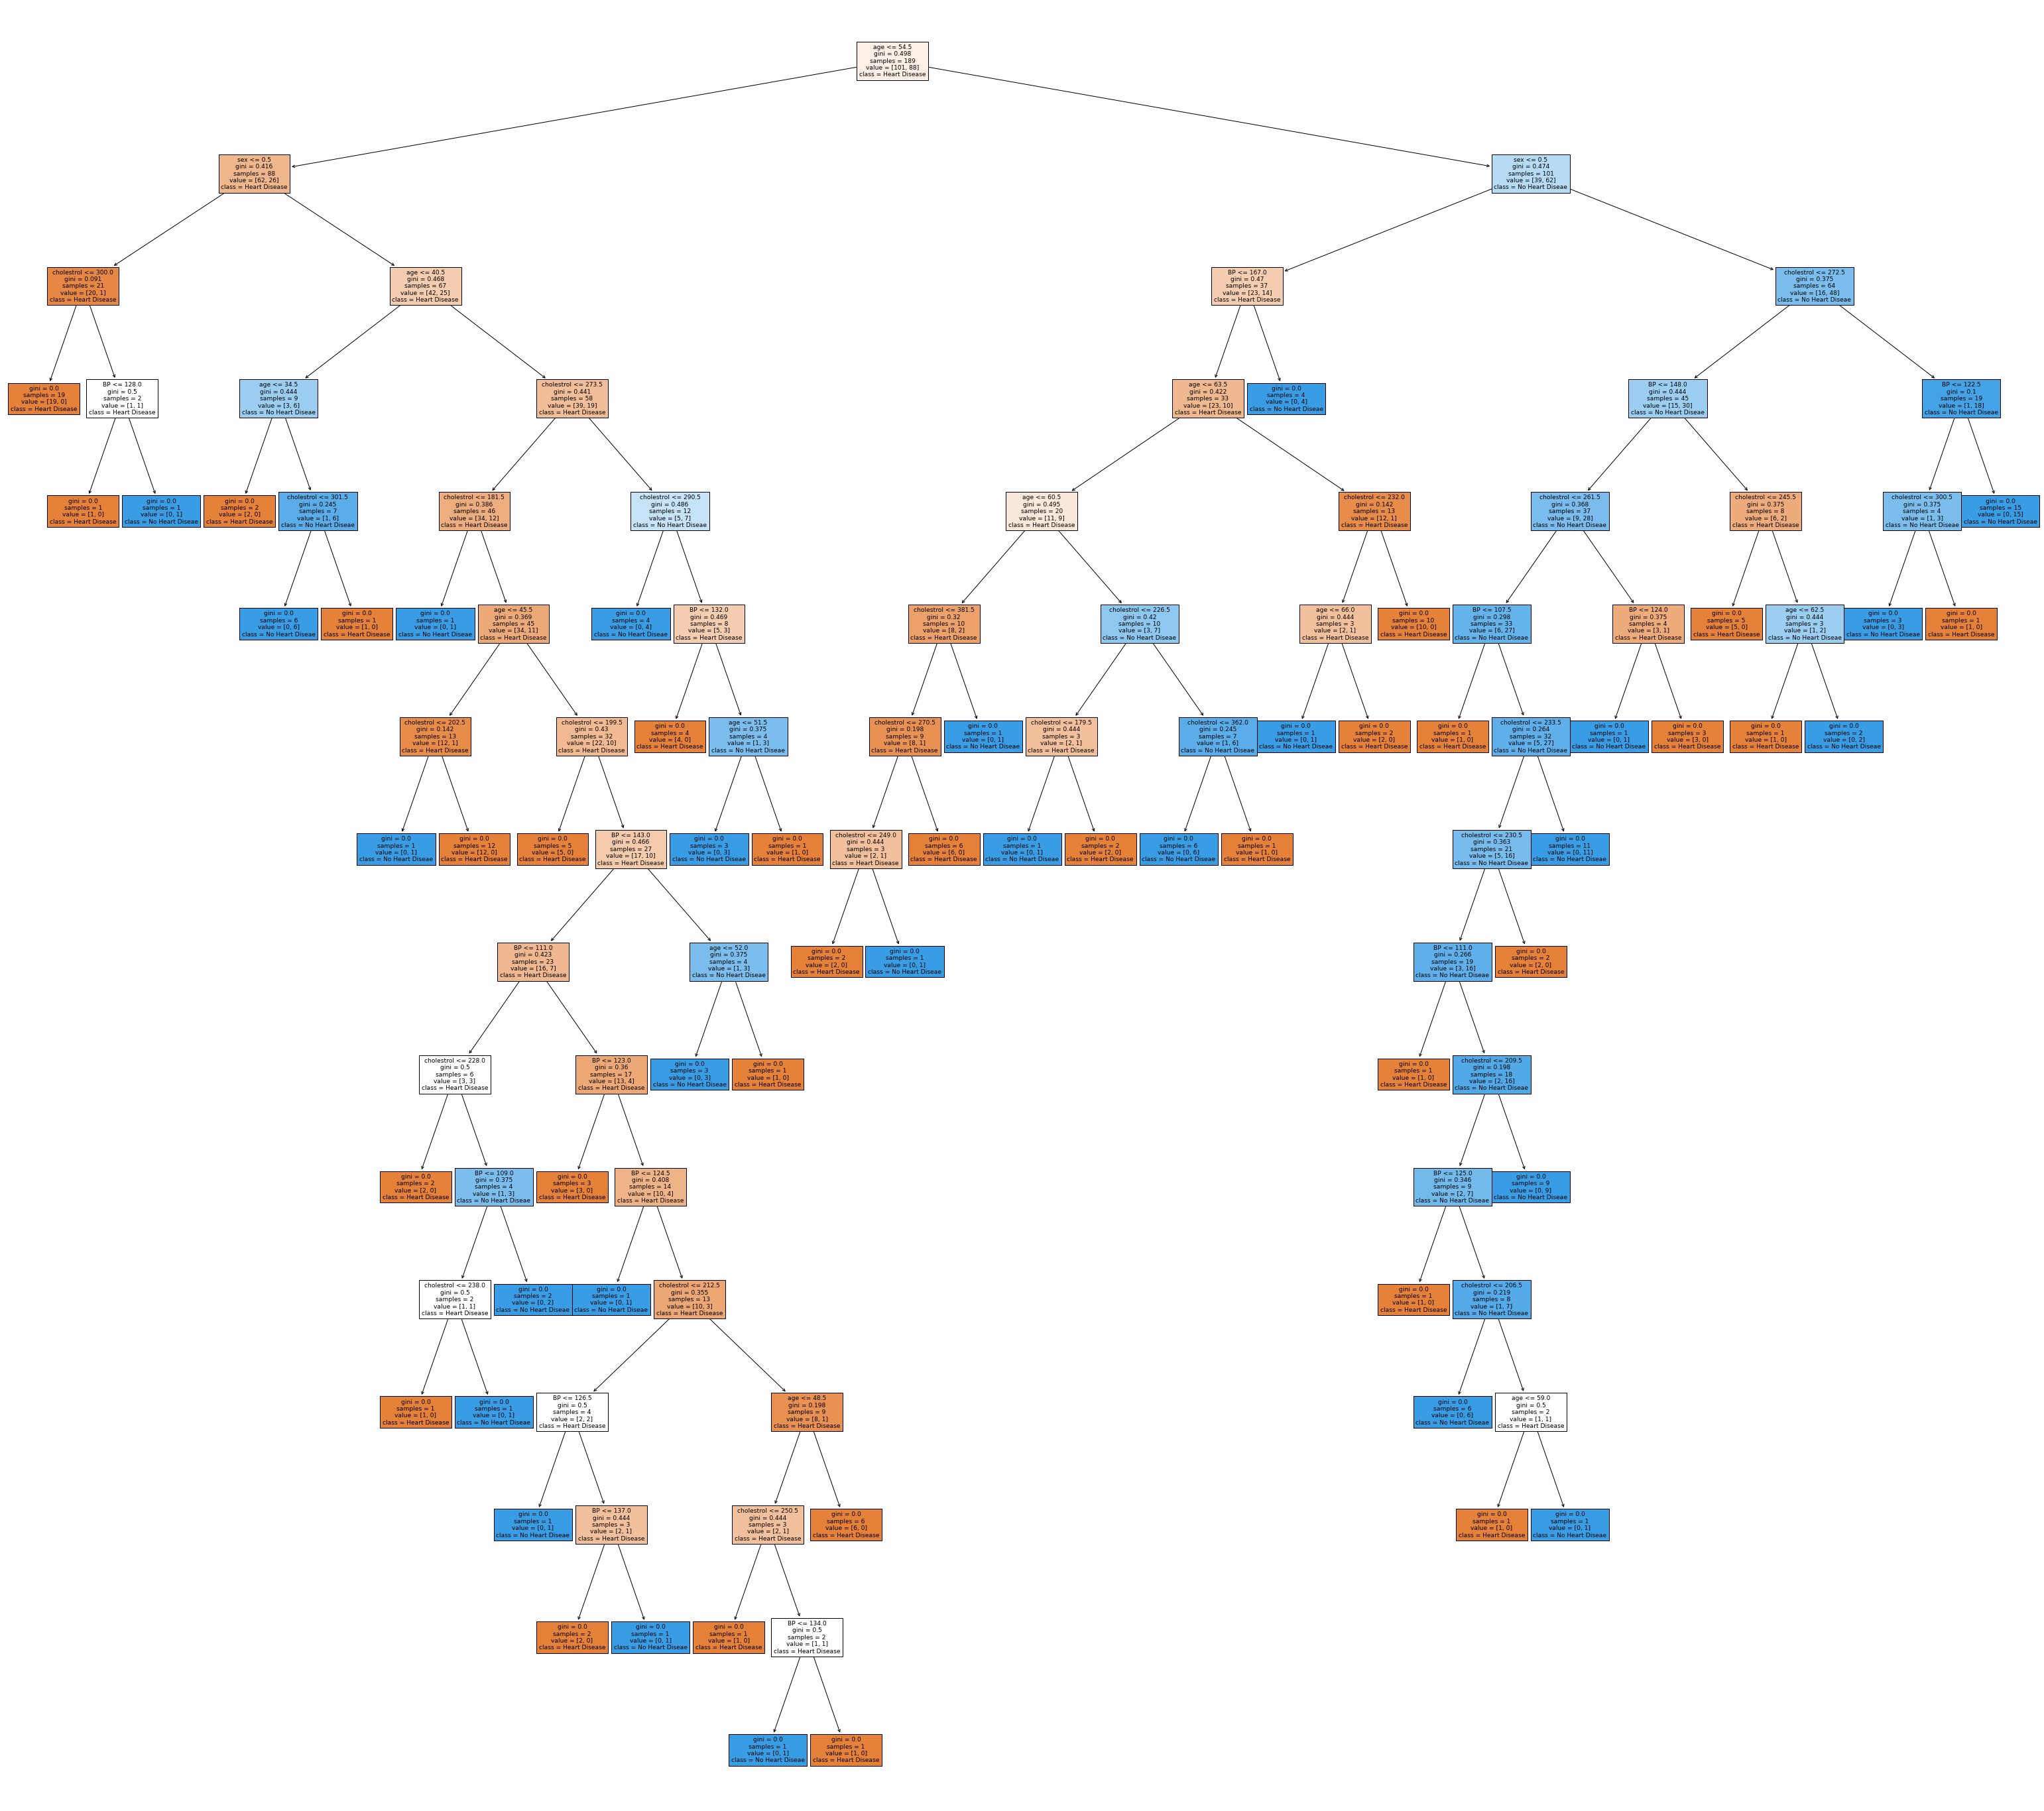

In [50]:
plt.figure(figsize=(55,50))
plot_tree(dt_default, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [45]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

In [46]:
?DecisionTreeClassifier

In [47]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

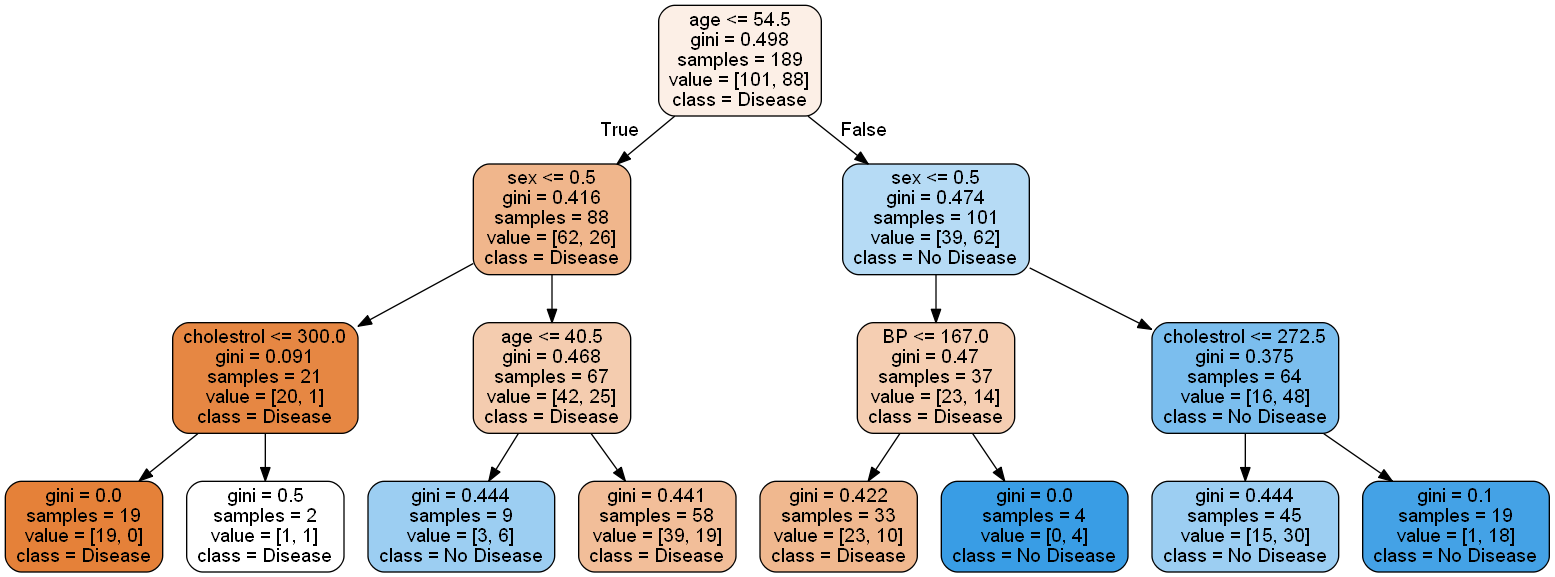

In [23]:
# gph = get_dt_graph(dt_depth) 
# Image(gph.create_png())

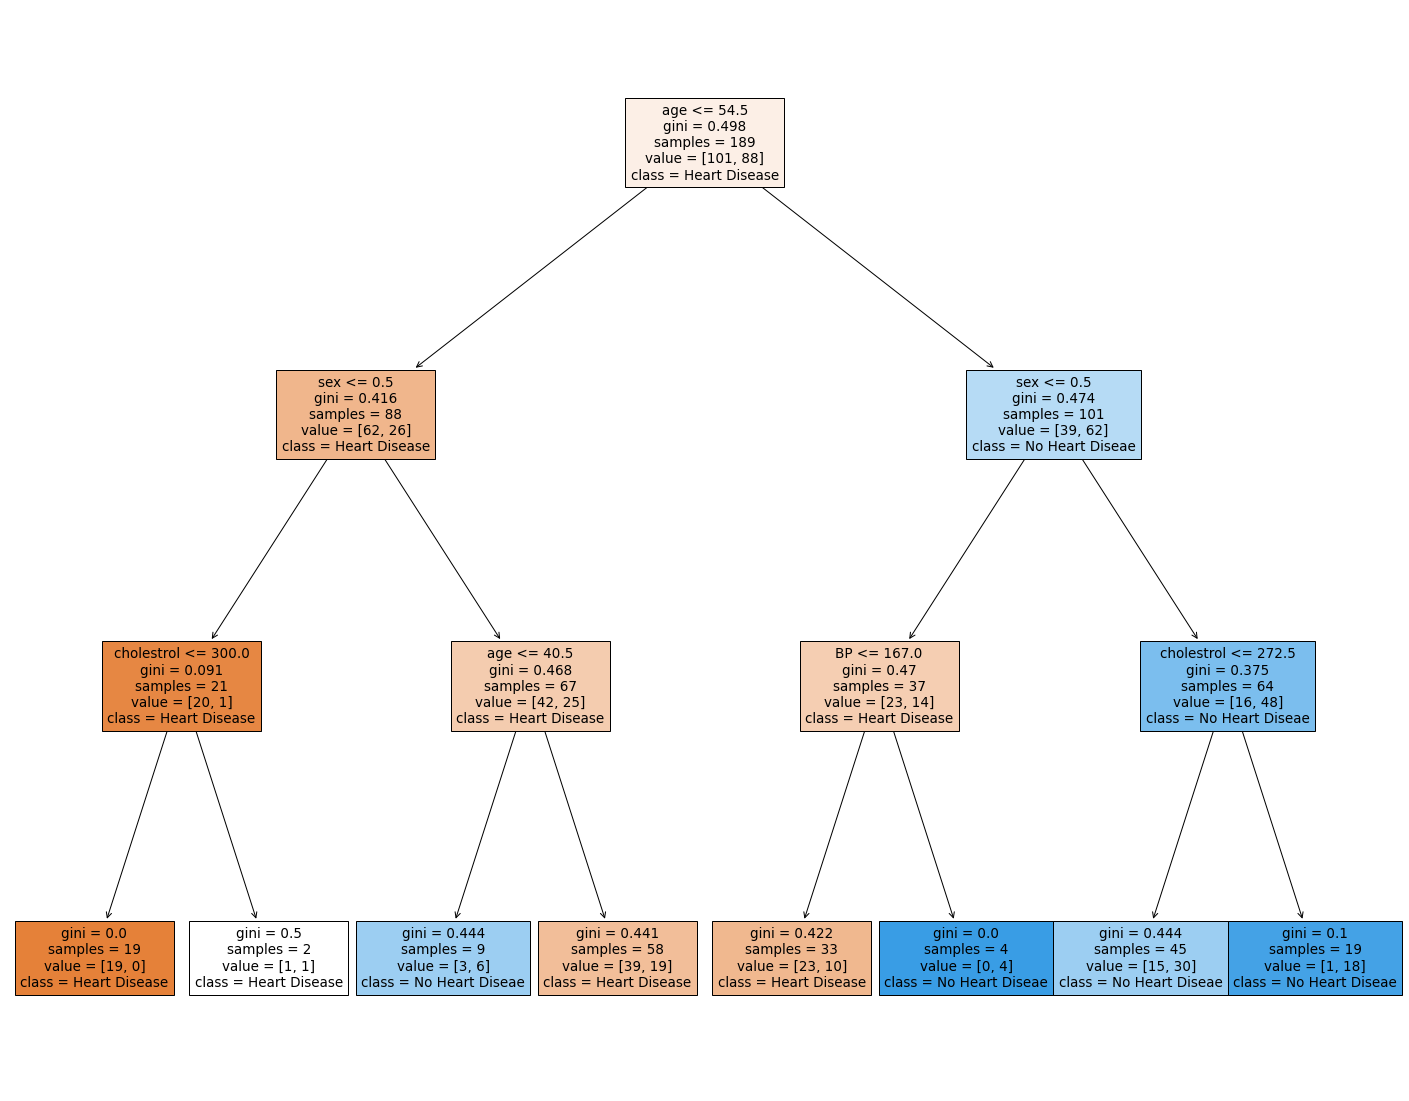

In [51]:
plt.figure(figsize=(25,20))
plot_tree(dt_depth, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [55]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [56]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

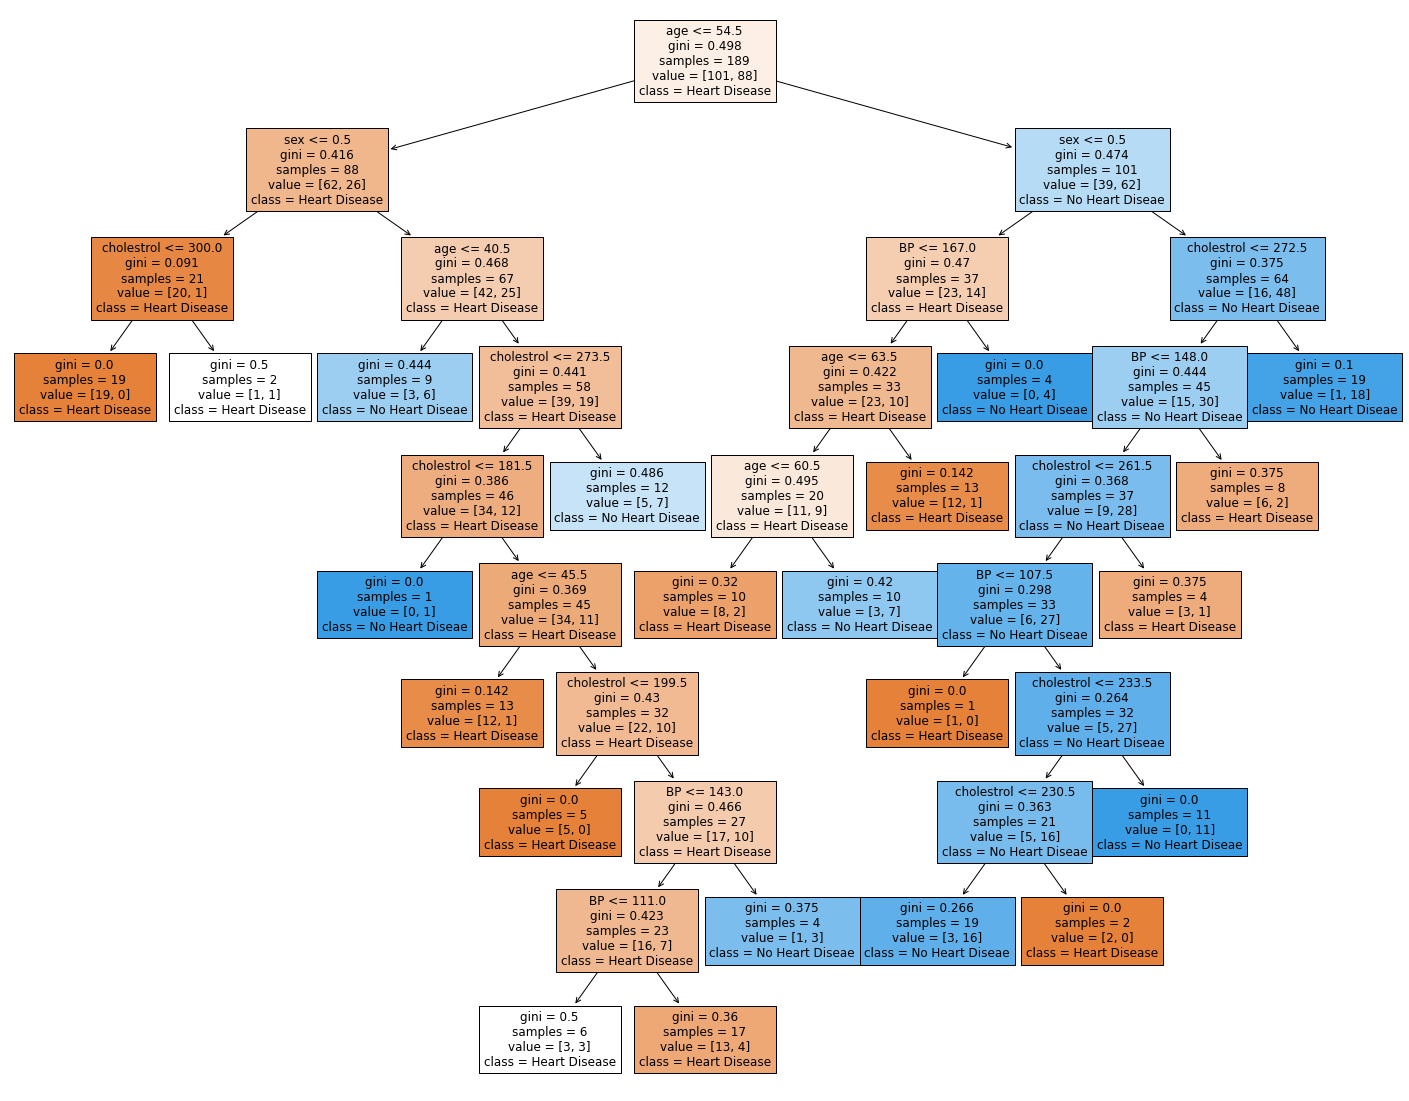

In [57]:
plt.figure(figsize=(25,20))
plot_tree(dt_min_split, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

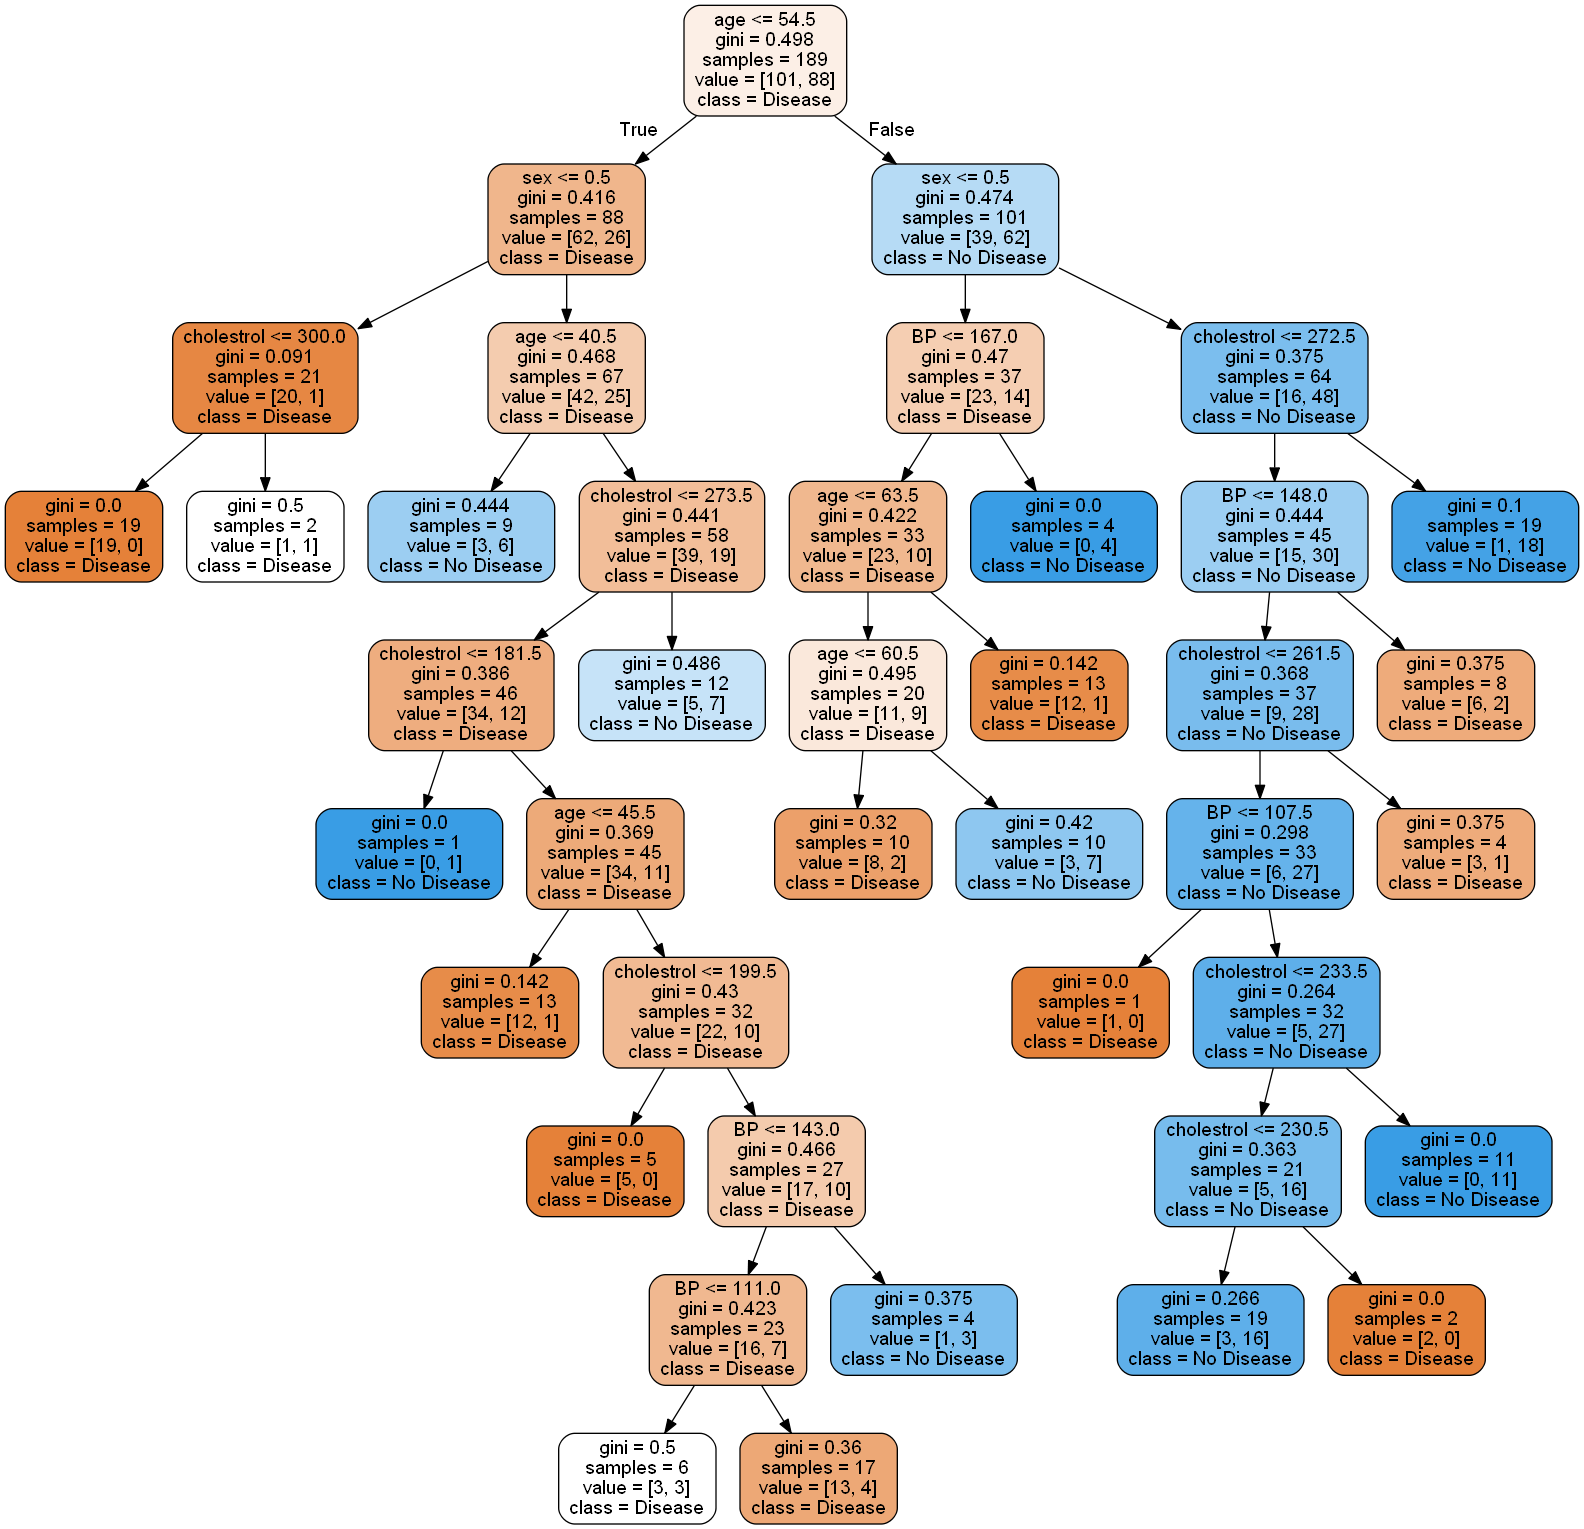

In [26]:
# gph = get_dt_graph(dt_min_split) 
# Image(gph.create_png())

In [58]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [59]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

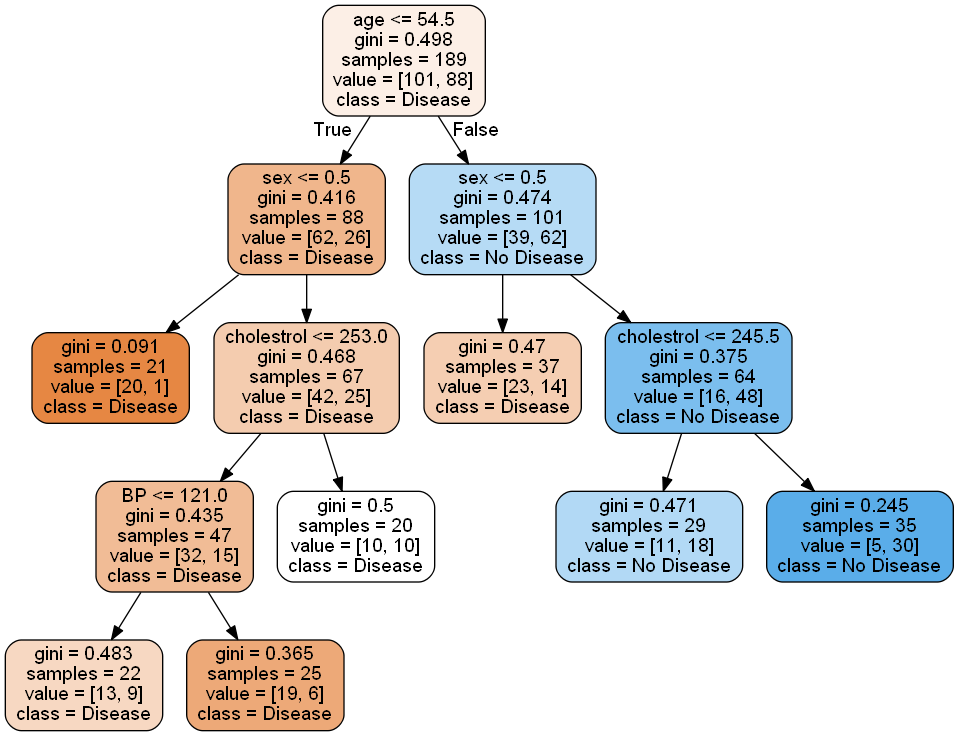

In [29]:
# gph = get_dt_graph(dt_min_leaf)
# Image(gph.create_png())

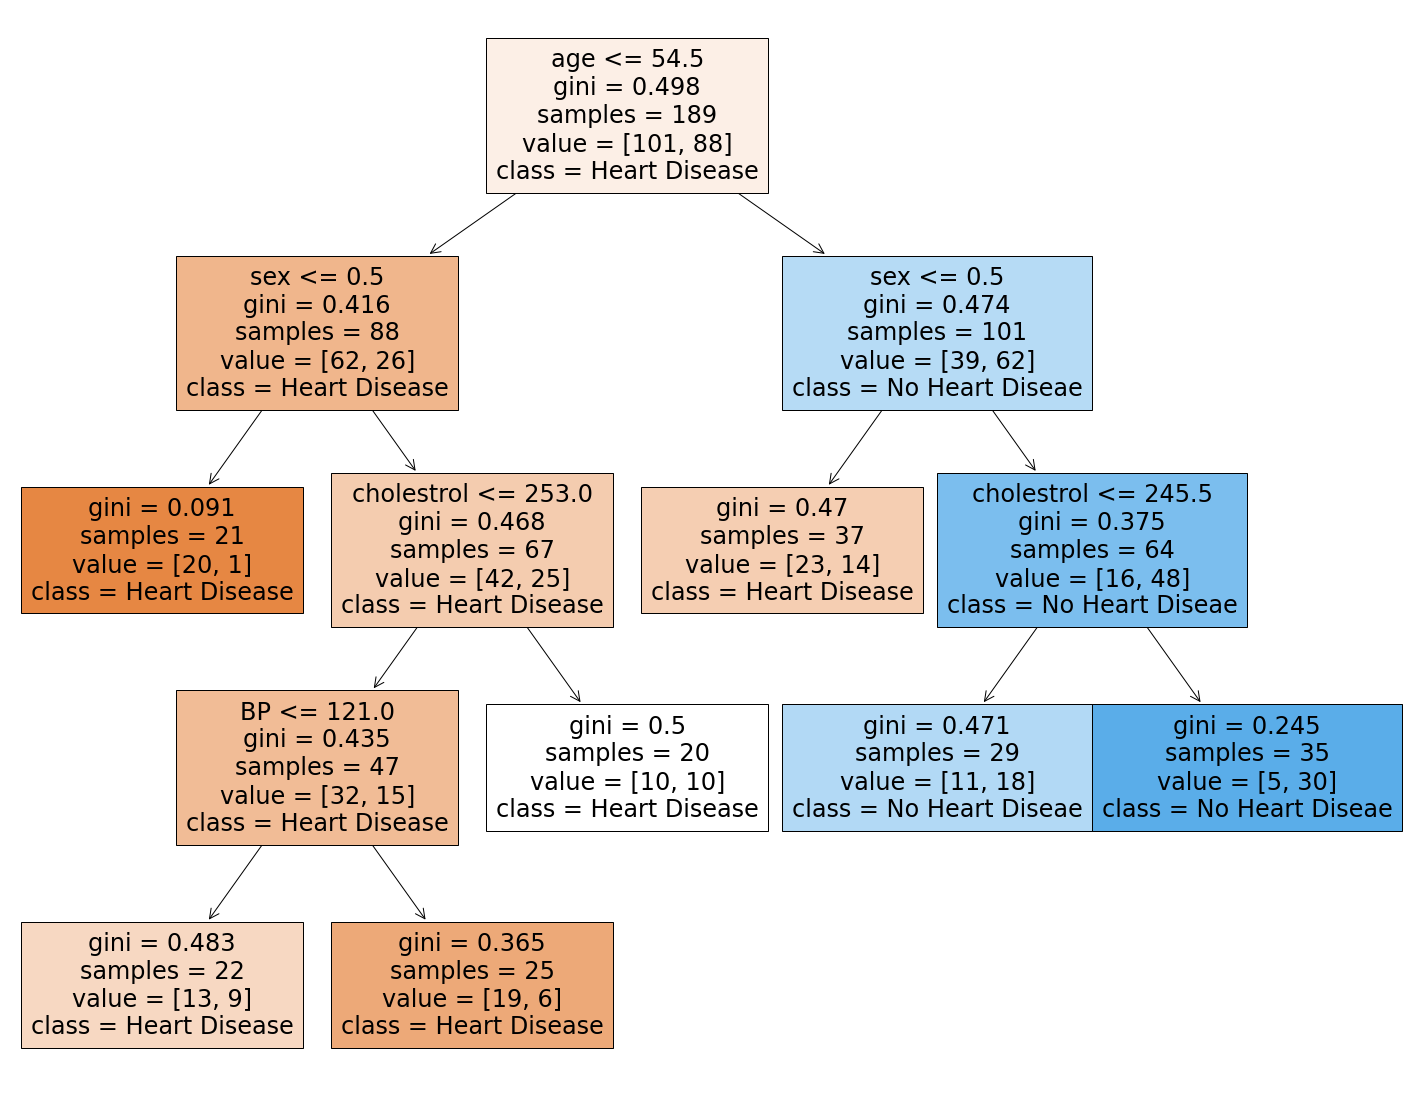

In [60]:
plt.figure(figsize=(25,20))
plot_tree(dt_min_leaf, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [61]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

In [62]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

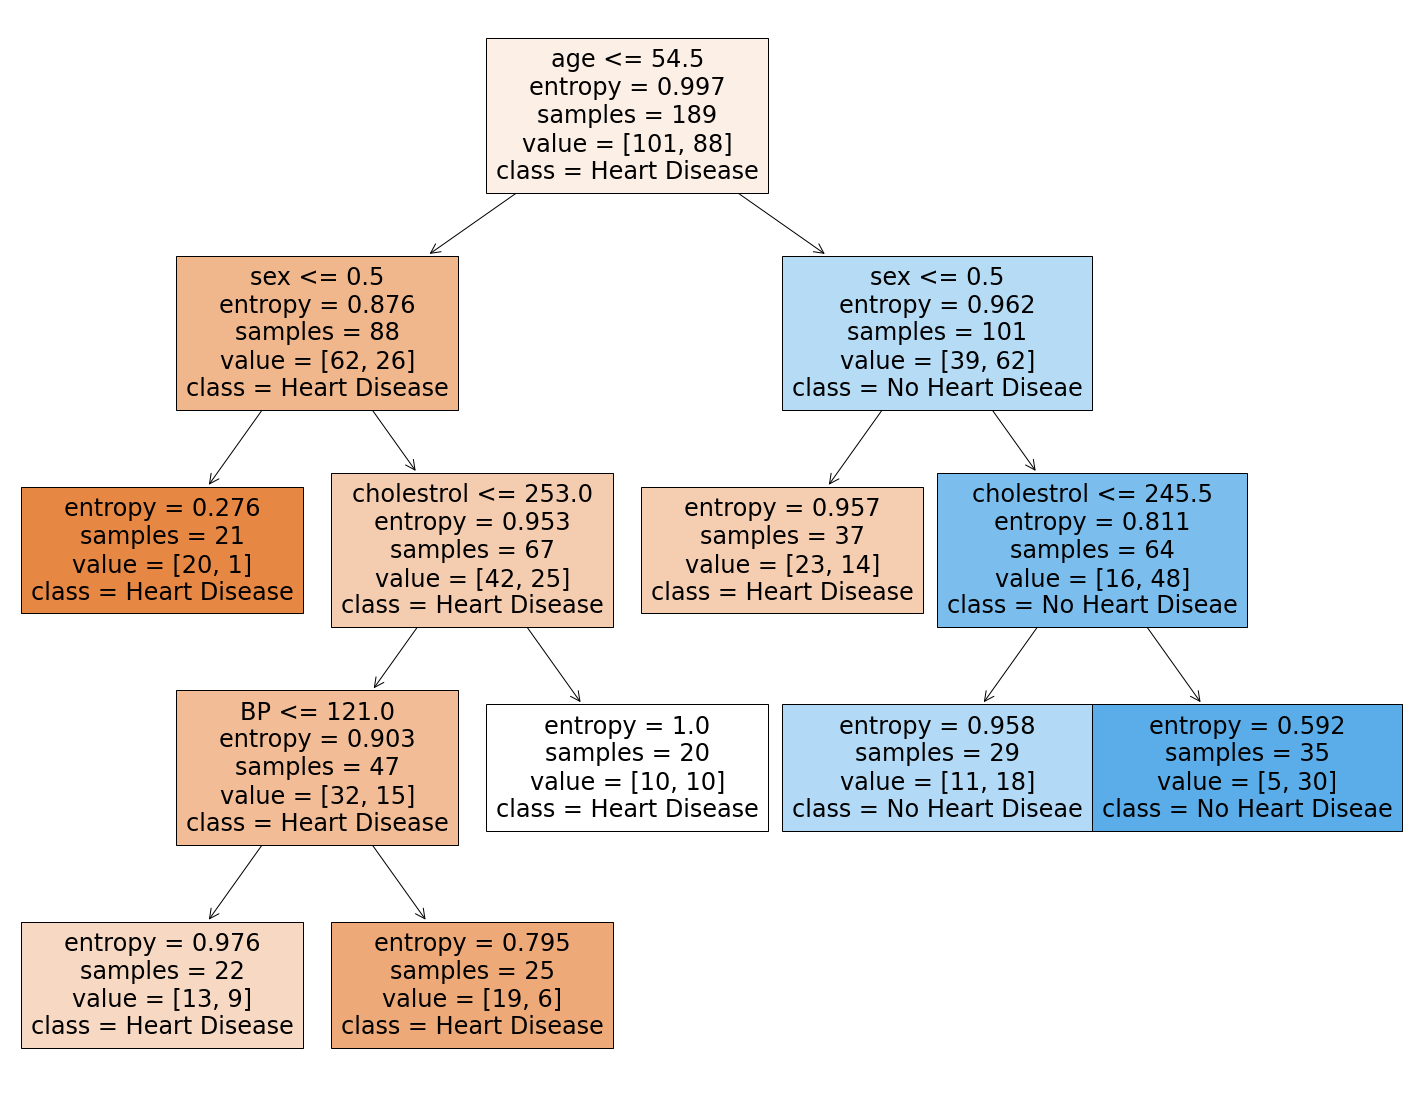

In [63]:
plt.figure(figsize=(25,20))
plot_tree(dt_min_leaf_entropy, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

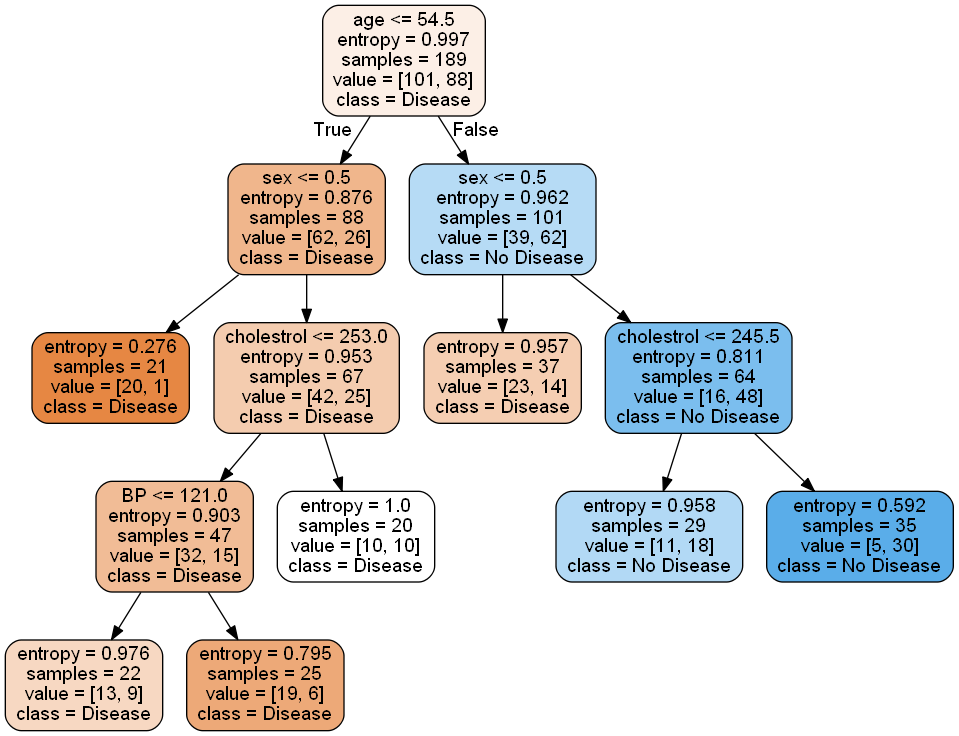

In [32]:
# gph = get_dt_graph(dt_min_leaf_entropy)
# Image(gph.create_png())

In [64]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [65]:
dt = DecisionTreeClassifier(random_state=42)

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [68]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [69]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [70]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 46.9 ms
Wall time: 3.05 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [72]:
grid_search.cv_results_

{'mean_fit_time': array([0.00525129, 0.00357908, 0.00375044, 0.00325054, 0.00249964,
        0.0024997 , 0.00231832, 0.00260776, 0.00255883, 0.00250065,
        0.00225008, 0.0021612 , 0.00202757, 0.00174999, 0.00225013,
        0.00200045, 0.00250012, 0.00199991, 0.00200057, 0.00250125,
        0.00249988, 0.00224996, 0.00249982, 0.00258696, 0.00242078,
        0.00267142, 0.0019998 , 0.00278866, 0.00182414, 0.00233155,
        0.00201213, 0.00225949, 0.00225759, 0.0020076 , 0.00200605,
        0.0025053 , 0.00250548, 0.002002  , 0.00249982, 0.00249982,
        0.00309652, 0.00234592, 0.0028438 , 0.00278795, 0.00199986,
        0.00263995, 0.0026195 , 0.00227416, 0.00231397, 0.00237906]),
 'std_fit_time': array([2.77335760e-03, 5.88744072e-04, 4.33119012e-04, 4.33222415e-04,
        4.99785408e-04, 5.00202591e-04, 1.84427241e-04, 6.24470155e-04,
        5.20368321e-04, 5.01037665e-04, 4.32843842e-04, 1.89002438e-04,
        3.56266944e-04, 4.33188220e-04, 4.32947310e-04, 2.06476546e-0

In [73]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005251      0.002773         0.003000    7.057073e-04   
1       0.003579      0.000589         0.002001    6.951036e-07   
2       0.003750      0.000433         0.002001    5.161914e-07   
3       0.003251      0.000433         0.001999    4.256623e-07   
4       0.002500      0.000500         0.001464    5.831291e-04   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.541667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.680851           0.574468           0.702128         0.656028   
4           0.531915           0.531915           0.531915         0.534353   

   std_test_score  rank_test_score  
0        0.082762               17  
1        0.082762               17  
2        0.079551               20  
3        0.048751                3  
4        0.004223               41

In [74]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.002012      0.000706         0.001005    3.307924e-06   
5        0.002500      0.000500         0.001355    4.099124e-04   
3        0.003251      0.000433         0.001999    4.256623e-07   
8        0.002559      0.000520         0.001519    5.203178e-04   
13       0.001750      0.000433         0.001500    5.001426e-04   

   param_criterion param_max_depth param_min_samples_leaf  \
30         entropy               3                      5   
5             gini               3                      5   
3             gini               2                     50   
8             gini               3                     50   
13            gini               5                     50   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.666667   
13  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.666667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
5            0.744681           0.595745           0.659574         0.656250   
3            0.680851           0.574468           0.702128         0.656028   
8            0.680851           0.574468           0.702128         0.656028   
13           0.680851           0.574468           0.702128         0.656028   

    std_test_score  rank_test_score  
30        0.064090                1  
5         0.055831                2  
3         0.048751                3  
8         0.048751                3  
13        0.048751                3

In [75]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [76]:
dt_best = grid_search.best_estimator_

In [77]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



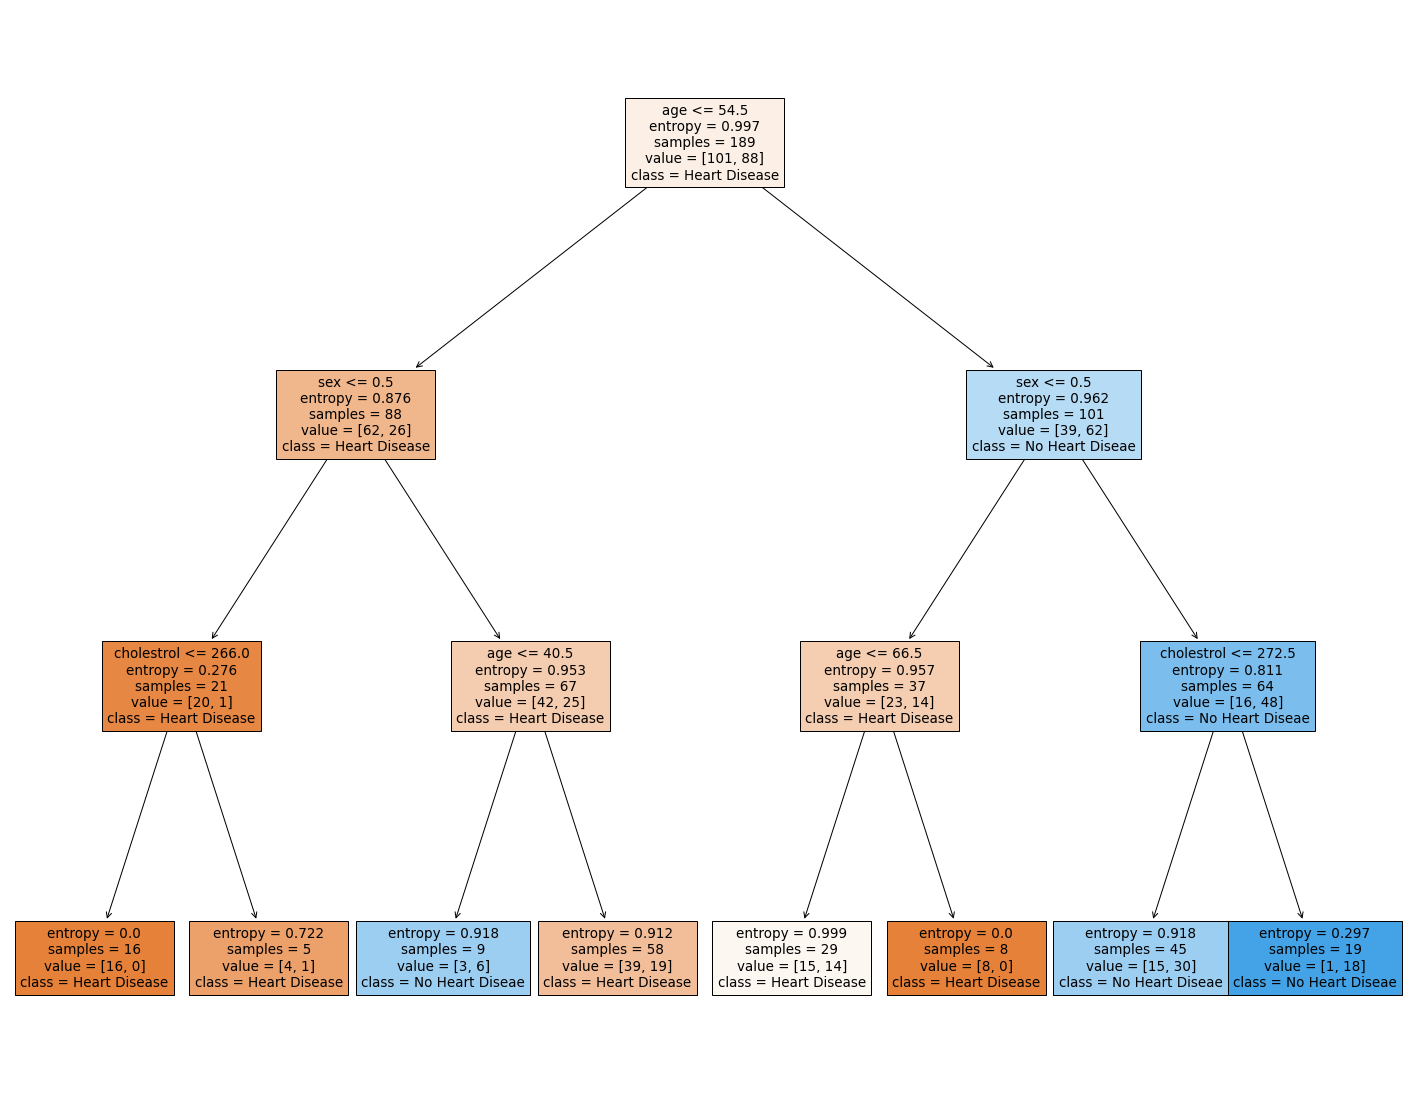

In [80]:
plt.figure(figsize=(25,20))
plot_tree(dt_best, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

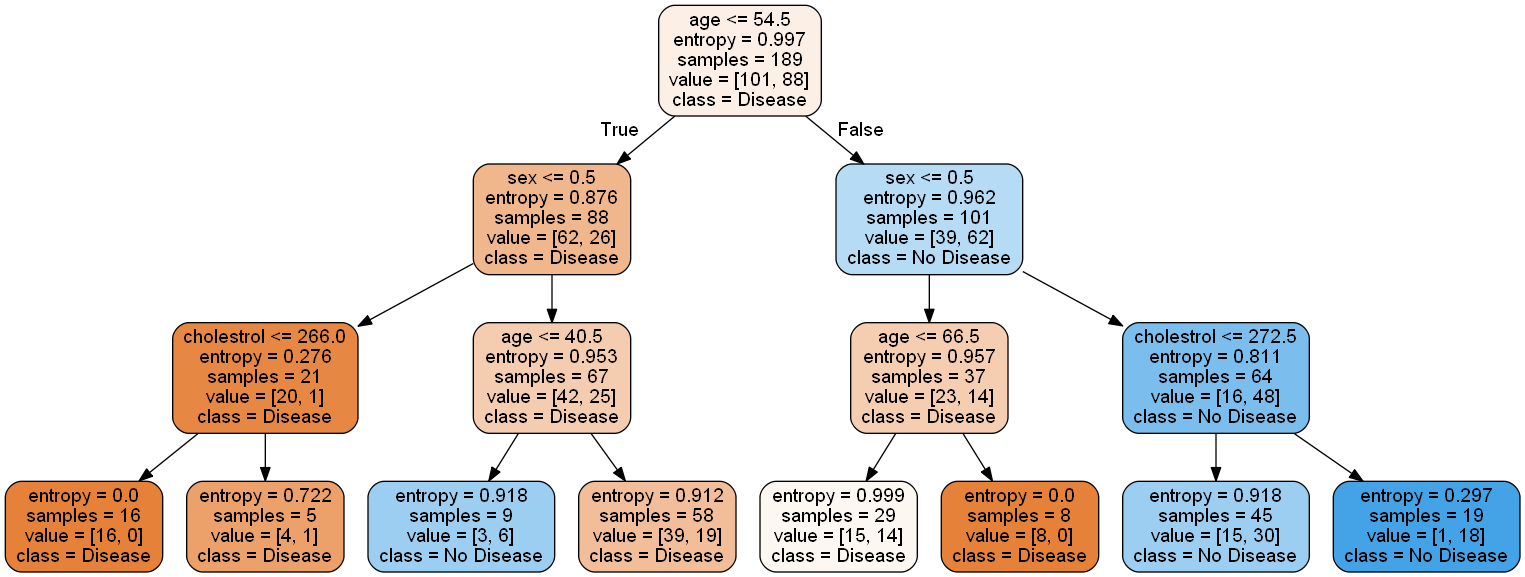

In [47]:
# gph = get_dt_graph(dt_best)
# Image(gph.create_png())

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, oob_score=True) # oob_score=True is given for calculating out of bag error

In [96]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [97]:
rf.estimators_    # All the sample decision trees are shown here

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [98]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [99]:
sample_tree = rf.estimators_[4]

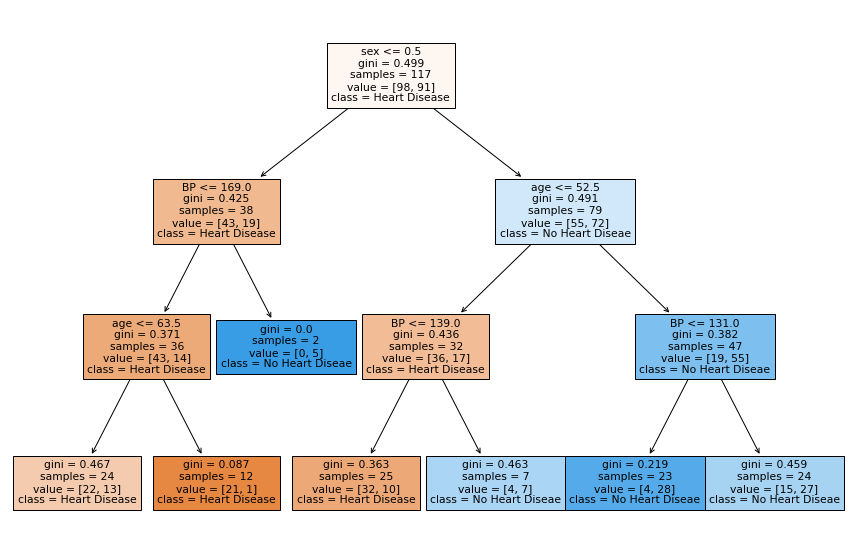

In [100]:
plt.figure(figsize=(15,10))
plot_tree(sample_tree, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [101]:
# gph = get_dt_graph(sample_tree)
# Image(gph.create_png(), width=700, height=700)

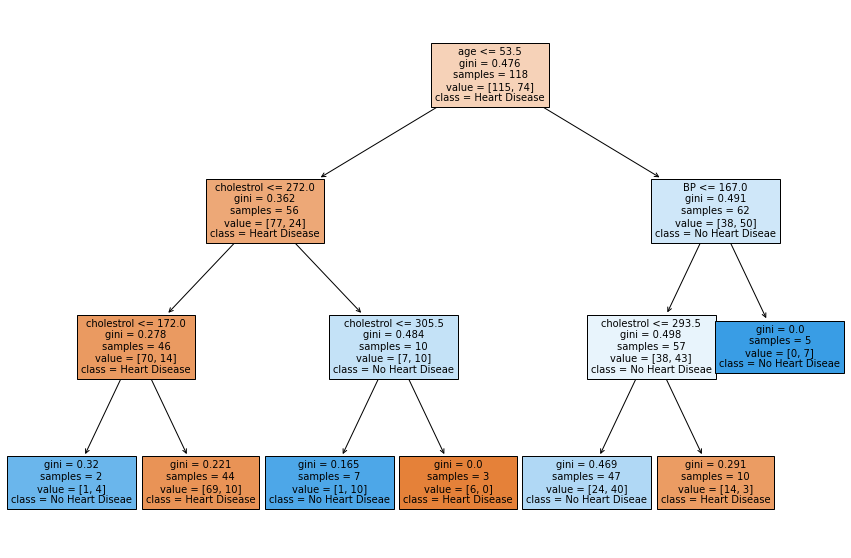

In [102]:
plt.figure(figsize=(15,10))
plot_tree(rf.estimators_[2], 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [103]:
# gph = get_dt_graph(rf.estimators_[2])
# Image(gph.create_png(), width=700, height=700)

In [104]:
evaluate_model(rf)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[80 21]
 [28 60]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[35 14]
 [17 15]]


In [105]:
rf.oob_score

True

In [106]:
rf.oob_score_

0.6349206349206349

#### Grid search for hyper-parameter tuning

In [107]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [108]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [109]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [110]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 1.73 s
Wall time: 25.4 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [111]:
rf_best = grid_search.best_estimator_

In [112]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [113]:
evaluate_model(rf_best)

Train Accuracy : 0.8042328042328042
Train Confusion Matrix:
[[87 14]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.8024691358024691
Test Confusion Matrix:
[[42  7]
 [ 9 23]]


In [116]:
rf_best.estimators_

[DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                        random_state=415968276),
 DecisionTreeClassif

In [114]:
sample_tree = rf_best.estimators_[0]

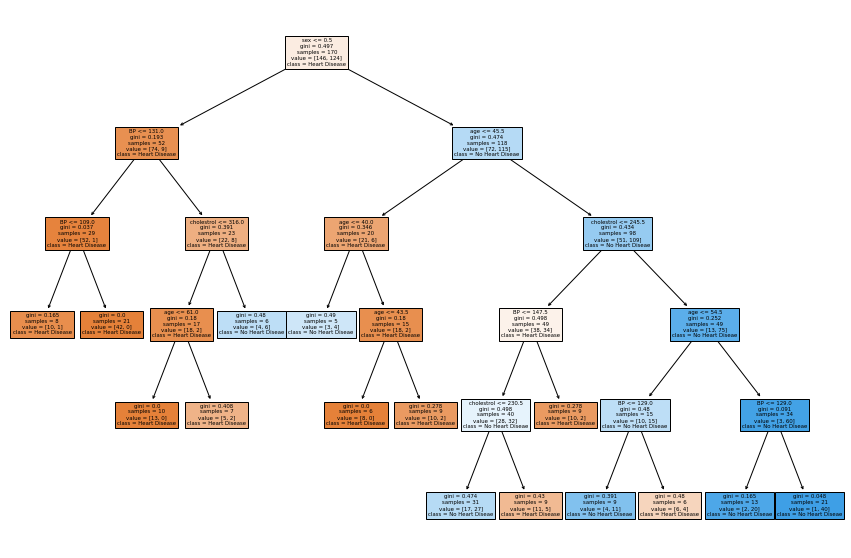

In [120]:
plt.figure(figsize=(15,10))
plot_tree(sample_tree, 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

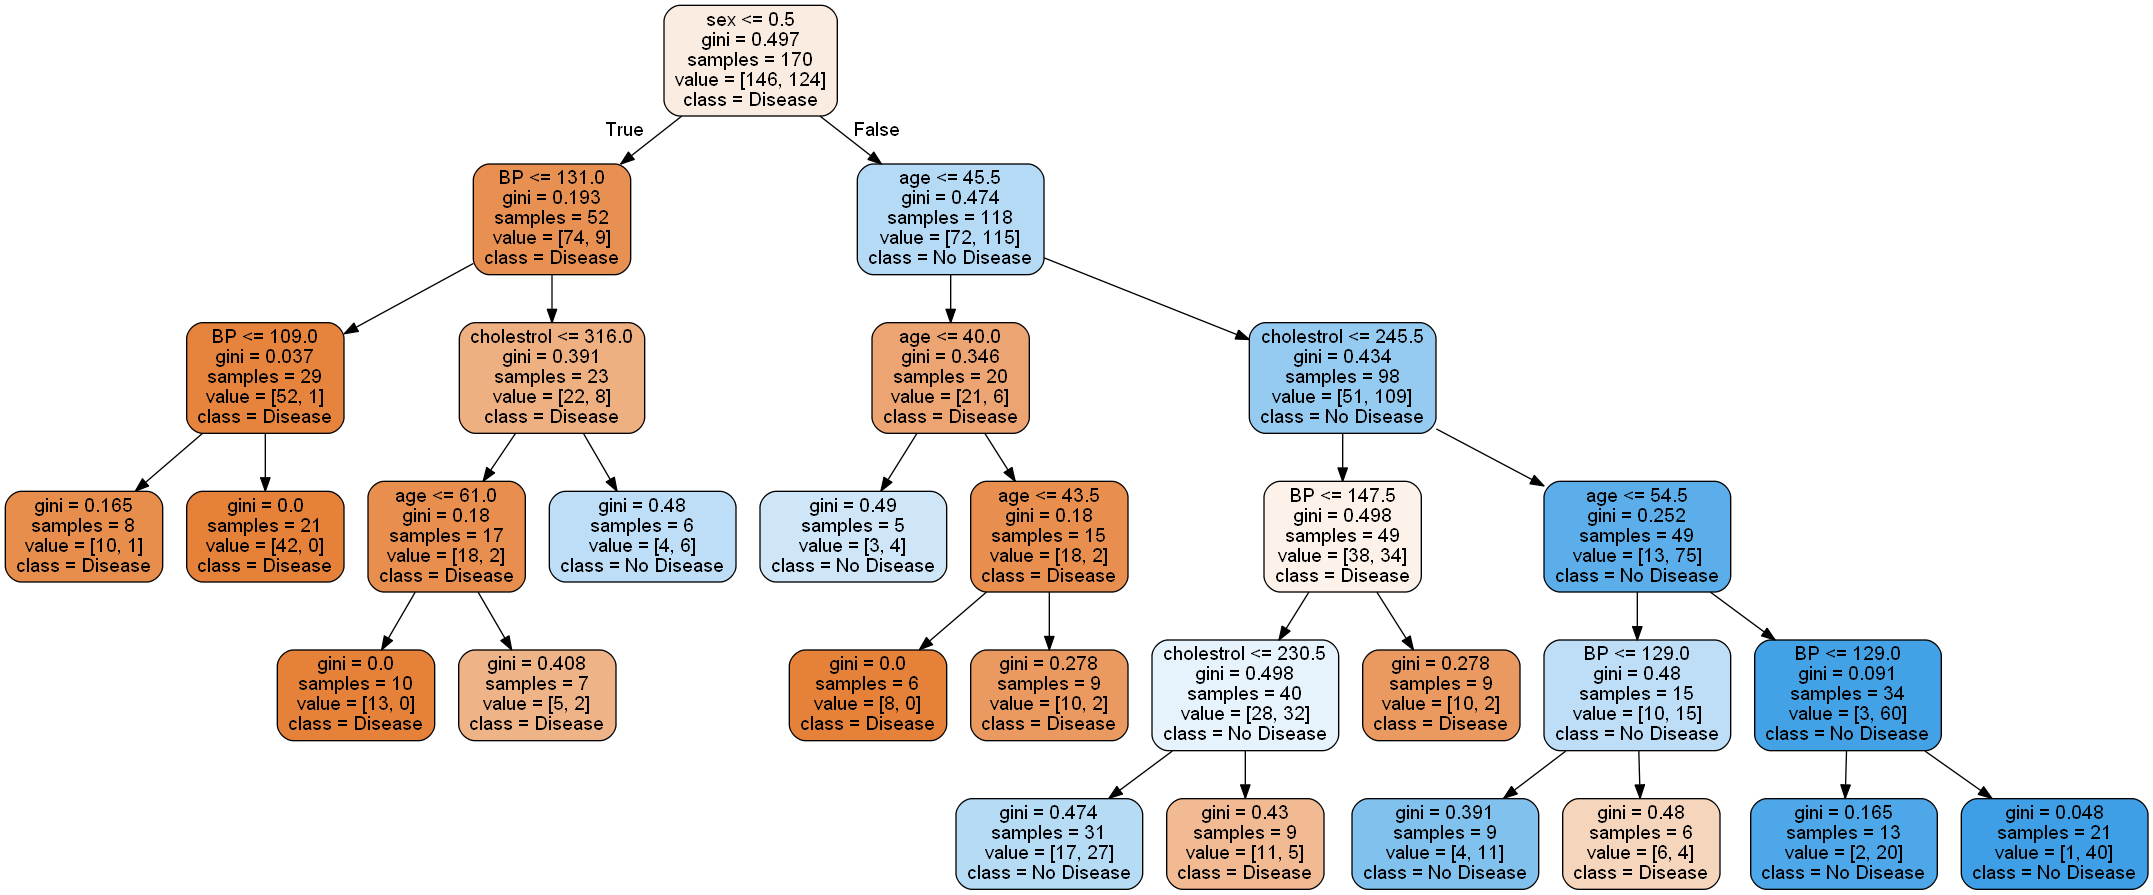

In [64]:
# gph = get_dt_graph(sample_tree)
# Image(gph.create_png())

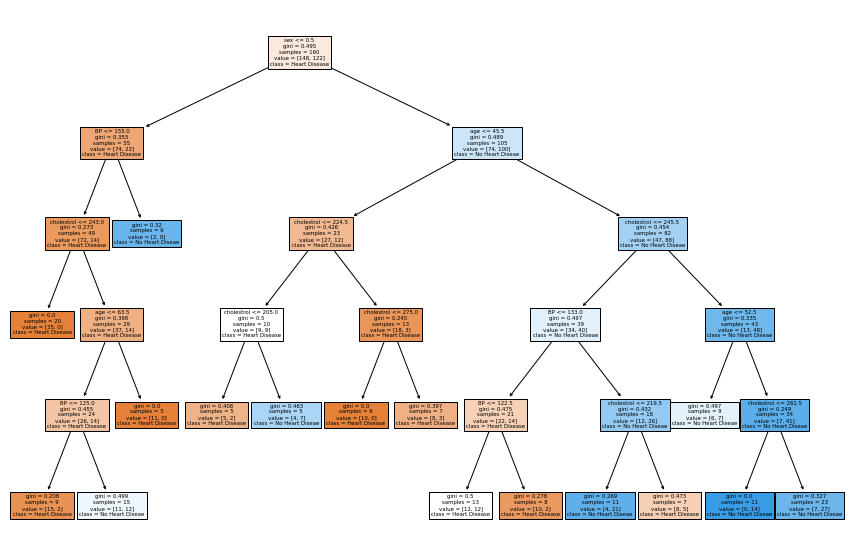

In [121]:
plt.figure(figsize=(15,10))
plot_tree(rf_best.estimators_[2], 
          filled=True, 
          feature_names=['age','sex','BP','cholestrol'], 
          class_names = ['Heart Disease','No Heart Diseae'])
plt.show()

In [122]:
# gph = get_dt_graph(rf_best.estimators_[0])
# Image(gph.create_png(), height=600, width=600)

In [123]:
# gph = get_dt_graph(rf_best.estimators_[10])
# Image(gph.create_png(), height=600, width=600)

### Variable importance in RandomForest and Decision trees

In [67]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [68]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [69]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [70]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [71]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
0         age  0.375397
3  cholestrol  0.278449
2          BP  0.208346
1         sex  0.137808